In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.rcParams['font.size'] = 15

## All of the data in the cell below is available at __[Open Psychometrics.org](https://openpsychometrics.org/_rawdata/)__

In [4]:
# This data is from the online Rosenberg Self Esteem Scale test.
RSE = pd.read_csv('C:/Users/canin/Downloads/Psychology/RSE/data.csv', sep='\t')
RSE2 = pd.read_csv('C:/Users/canin/Downloads/Psychology/RSE/data.csv', sep='\t')
# # This data is from the online Big Five Personality test.
big5 = pd.read_csv('C:/Users/canin/Downloads/Psychology/BIG5/data.csv', sep='\t')
# # Experiences in Close Relationships Scale.
ECR = pd.read_csv('C:/Users/canin/Downloads/Psychology/ECR-data-1March2018/data.csv', sep=',')
# # Depression Anxiety Stress Scales.
DASS = pd.read_csv('C:/Users/canin/Downloads/Psychology/DASS_data_13.08.18/data.csv', sep='\t')
# # Open Sex Role Inventory
OSRI = pd.read_csv('C:/Users/canin/Downloads/Psychology/OSRI_data_Aug2018/data.csv', sep='\t')
# # Cattell's 16 Personality Factors Test 
PF16 = pd.read_csv('C:/Users/canin/Downloads/Psychology/16PF/data.csv', sep='\t')

In [5]:
# This helps make the later graphs more clear. 
def numbers_to_genders(value):
    if value == 1:
        return 'Male'
    if value == 2:
        return 'Female'
    if value == 3:
        return 'Other'
    if value == 0:
        return 'None Chosen'
       
        
def gender_to_number(value):
    if value == 'Men':
        return 1
    if value == 'Women':
        return 2
    else:
        return ('Something is wrong with your function.')
    
    
colors_for_genders = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']


def numbers_to_integers(value):
    value = int(value)
    
    
# I needed to create a function that would turn all the negative responses to the same as the positive. 
# Since 'Strongly Agree' is a 4 for both 'I am valuable' and 'I have no value'.
def reorder_numbers_RSE(value):
    if value == 4:
        return 1
    if value == 3:
        return 2
    if value == 2:
        return 3
    if value == 1:
        return 4
    else:
        return value

### Just to give you an idea of what i'm doing here's an example of one of the data sets.


# Rosenberg Self Esteem Test

## Info
The following items were rated on the following scale where:

**1 = strongly disagree <br>
2 = disagree <br>
3 = agree <br>
4 = strongly agree (0=no answer):**


-  Q1. I feel that I am a person of worth, at least on an equal plane with others.	
-  Q2. I feel that I have a number of good qualities.	
-  Q3. All in all, I am inclined to feel that I am a failure.	
-  Q4. I am able to do things as well as most other people.	
-  Q5. I feel I do not have much to be proud of.	
-  Q6. I take a positive attitude toward myself.	
-  Q7. On the whole, I am satisfied with myself.	
-  Q8. I wish I could have more respect for myself.	
-  Q9. I certainly feel useless at times.	
-  Q10. At times I think I am no good at all.


In [6]:
# The "None Chosen" category was only one percent of the test takers and on all the later graphs averaged out to being in
# between Men and Women, suggesting that it was simply a mistake and therefore irrelevant to any question about gender. So I removed them here.
RSE = RSE[(RSE['gender'] != 0)]
big5 = big5[(big5['gender'] != 0)]
PF16 = PF16[(PF16['gender'] != 0)]
ECR = ECR[(ECR['gender'] != 0)]
OSRI = OSRI[(OSRI['gender'] != 0)]
DASS = DASS[(DASS['gender'] != 0)]

In [7]:
RSE['gender'] = RSE['gender'].apply(numbers_to_genders)
big5['gender'] = big5['gender'].apply(numbers_to_genders)
PF16['gender'] = PF16['gender'].apply(numbers_to_genders)
ECR['gender'] = ECR['gender'].apply(numbers_to_genders)
OSRI['gender']= OSRI['gender'].apply(numbers_to_genders)
DASS['gender'] = DASS['gender'].apply(numbers_to_genders)

# I noticed there seems to be almost double the number of women taking the test than men. 

Text(0.5,1,'Number of people by Gender who took the Big5 Personality Test')

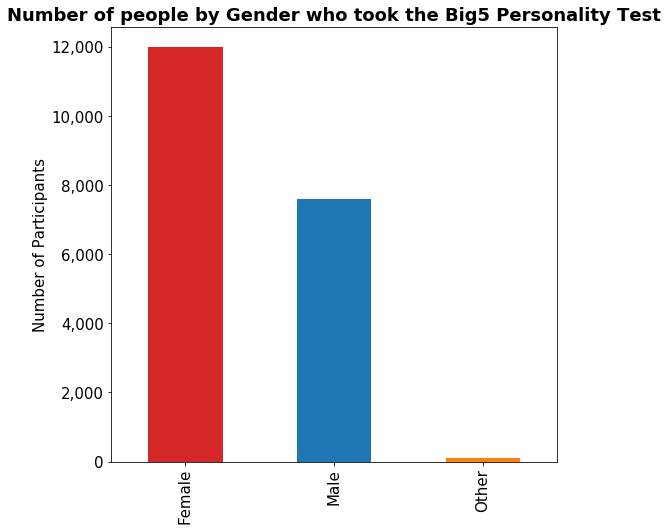

In [8]:
plot_gender_big5 = big5['gender'].value_counts().plot(kind ='bar', figsize= (8, 8), color = colors_for_genders)
# I don't know why this next line works but it does.It's supposed to put commas in my y-axis numbers.
plot_gender_big5.set_yticklabels(['{:,}'.format(int(x)) for x in plot_gender_big5.get_yticks().tolist()])
plt.ylabel('Number of Participants')
plt.title('Number of people by Gender who took the Big5 Personality Test',fontweight='bold')

Text(0.5,1,'Number of People Who Took the "Experiences in Close Relationships Scale" Test')

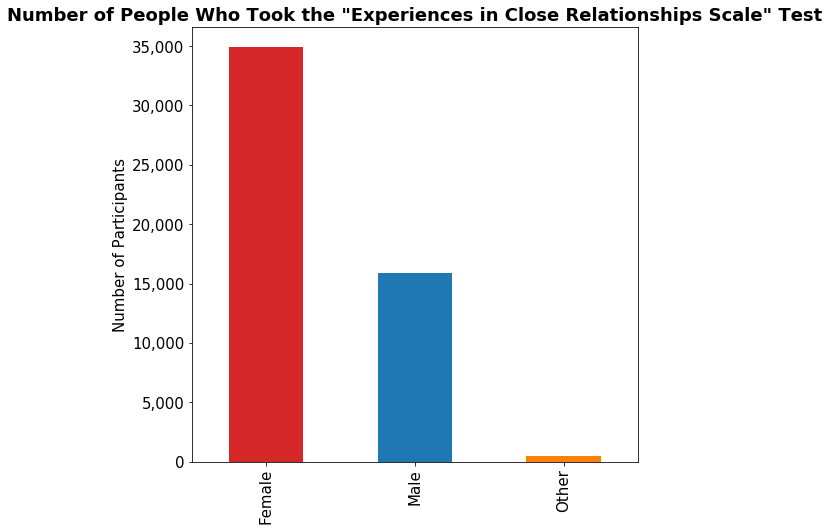

In [9]:
plot_gender_ECR = ECR.gender.value_counts().plot(kind='bar', figsize= (8, 8), color = colors_for_genders)
plot_gender_ECR.set_yticklabels(['{:,}'.format(int(x)) for x in plot_gender_ECR.get_yticks().tolist()])
plt.ylabel('Number of Participants')
plt.title('Number of People Who Took the "Experiences in Close Relationships Scale" Test',fontweight='bold')

Text(0.5,1,'Number of People who took the "Depression Anxiety Stress Scales" Test')

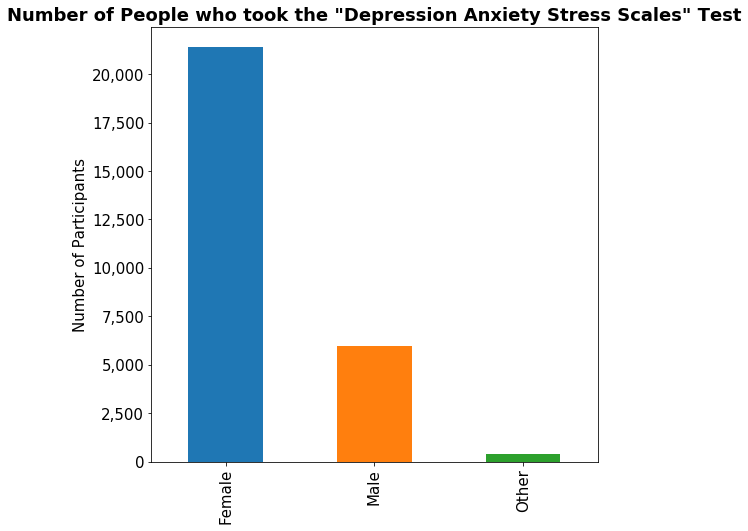

In [10]:
# Just more of the same data.
plot_gender_DASS = DASS['gender'].value_counts().plot(kind='bar', figsize=(8,8))
plot_gender_DASS.set_yticklabels(['{:,}'.format(int(x)) for x in plot_gender_DASS.get_yticks().tolist()])
plt.ylabel('Number of Participants')
plt.title('Number of People who took the "Depression Anxiety Stress Scales" Test',fontweight='bold')

Text(0.5,1,'Number of People who took the "Open Sex Role Index" Test')

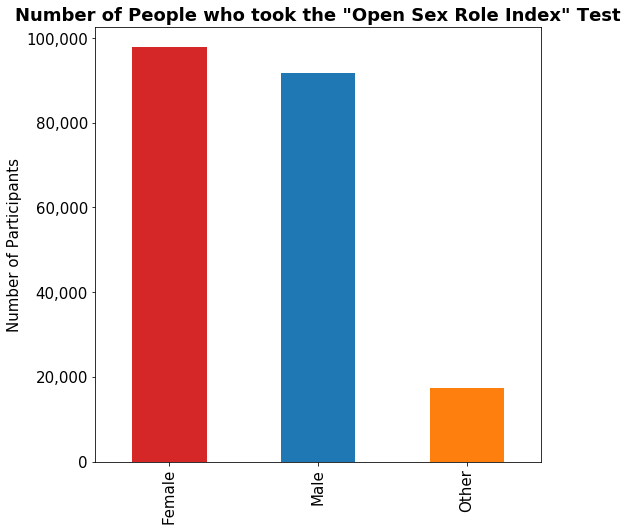

In [11]:
# This one is an anomaly. The men and women are pretty much equal in terms of response. I'm not sure why.
OSRI_plot = OSRI['gender'].value_counts().plot(kind = 'bar', figsize= (8, 8), color = colors_for_genders)
OSRI_plot.set_yticklabels(['{:,}'.format(int(x)) for x in OSRI_plot.get_yticks().tolist()])
plt.ylabel('Number of Participants')
plt.title('Number of People who took the "Open Sex Role Index" Test',fontweight='bold')

In [12]:
RSE['Q3'], RSE['Q5'], RSE['Q8'], RSE['Q9'], RSE['Q10'] = RSE['Q3'].apply(reorder_numbers_RSE), RSE['Q5'].apply(reorder_numbers_RSE), RSE['Q8'].apply(reorder_numbers_RSE), RSE['Q9'].apply(reorder_numbers_RSE), RSE['Q10'].apply(reorder_numbers_RSE)

# Some interesting data that shows Women similarly outnumbering Men in other potentially related fields.

<img src="https://www.apa.org/Images/ACS-figure-4_tcm7-189694.jpg"  alt = Percentage of female psychologists  title = "Labour Force Stats" />
<img src="https://www.apa.org/Images/cover-men2_tcm7-106295.jpg"  alt = Percentage of female psychologists  title = "Labour Force Stats" />
<img src = "https://static1.squarespace.com/static/55c2526fe4b0030db3b0f47c/t/5a15a50c71c10b644b09b92c/1511367953444/most+popular+men.PNG?" />


# I was wondering if there would be anything interesting revealed from the data itself, from the questions about people's overall mental health.

Text(0,0.5,'Level of Self-Esteem')

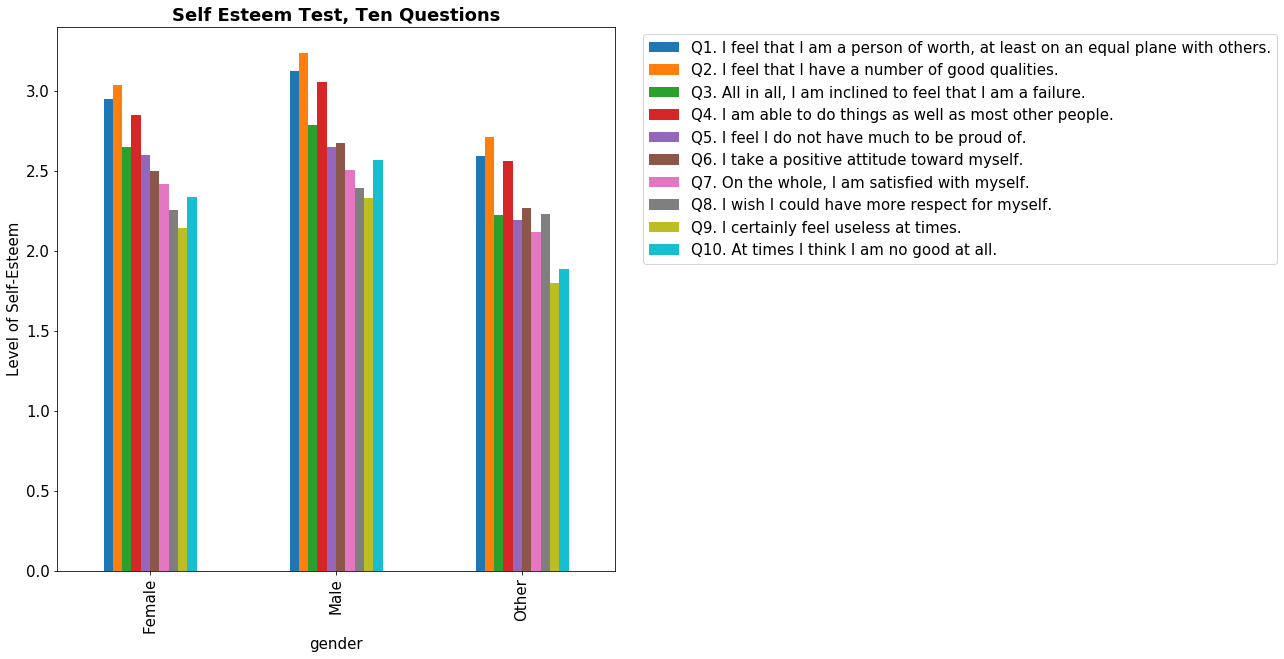

In [13]:
# This is in order to remove the people who didn't answer the question from messing up the average. Since anyone who didn't answer was given a 0. 
RSE = RSE[(RSE.Q1 != 0) & (RSE.Q2 != 0) & (RSE.Q3 != 0) & (RSE.Q4 != 0) & (RSE.Q5 != 0) & (RSE.Q6 != 0) & (RSE.Q7 != 0) & (RSE.Q8 != 0) & (RSE.Q9 != 0) & (RSE.Q10 != 0)]
# Needed to eliminate the non-question columns.
RSE_just_questions = RSE.drop(['age','source'], axis=1)
RSE_columns = list(RSE_just_questions.columns)
plot_RSE = RSE.groupby('gender')[RSE_columns].mean().plot(kind='bar', figsize= (10, 10))
plot_RSE.legend(['Q1. I feel that I am a person of worth, at least on an equal plane with others.',
                 'Q2. I feel that I have a number of good qualities.',
                 'Q3. All in all, I am inclined to feel that I am a failure.',
                 'Q4. I am able to do things as well as most other people.',
                 'Q5. I feel I do not have much to be proud of.',
                 'Q6. I take a positive attitude toward myself.',
                 'Q7. On the whole, I am satisfied with myself.',
                 'Q8. I wish I could have more respect for myself.',
                 'Q9. I certainly feel useless at times.',
                 'Q10. At times I think I am no good at all.'], loc='upper right', bbox_to_anchor=(2.2, 1))
plt.title('Self Esteem Test, Ten Questions',fontweight='bold')
plt.ylabel('Level of Self-Esteem')

Text(0.5,1,'Average Level of Self-Esteem for the Ten Questions per Gender')

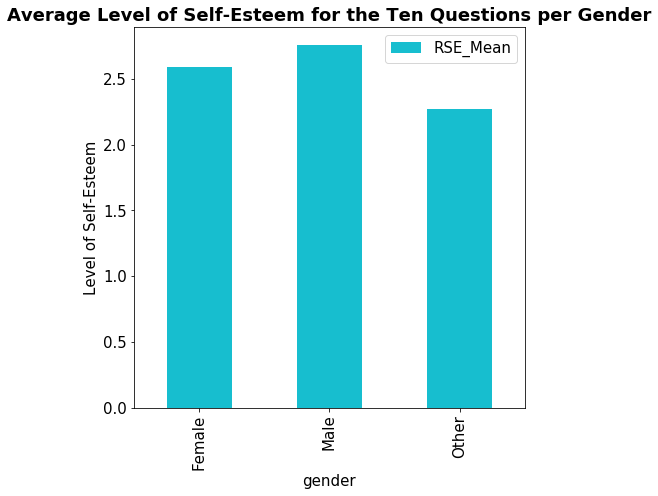

In [14]:
# Create a category that is the overall average of answers for all the questions per person.
RSE['RSE_Mean'] = RSE[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q9', 'Q10']].mean(axis=1)
RSE.groupby('gender')[['RSE_Mean']].mean().plot(kind='bar', figsize= (7, 7), color= '#17becf')
plt.ylabel('Level of Self-Esteem')
plt.title('Average Level of Self-Esteem for the Ten Questions per Gender',fontweight='bold')

In [15]:
DASS2 = DASS.drop(['screenw', 'screenh', 'hand', 'religion', 'orientation', 'race', 'voted', 'married', 'familysize', 'major', 'age', 'engnat', 'education', 'urban', 'introelapse', 'testelapse', 'surveyelapse'], axis=1)

Text(0,0.5,'Level of Depression/Anxiety')

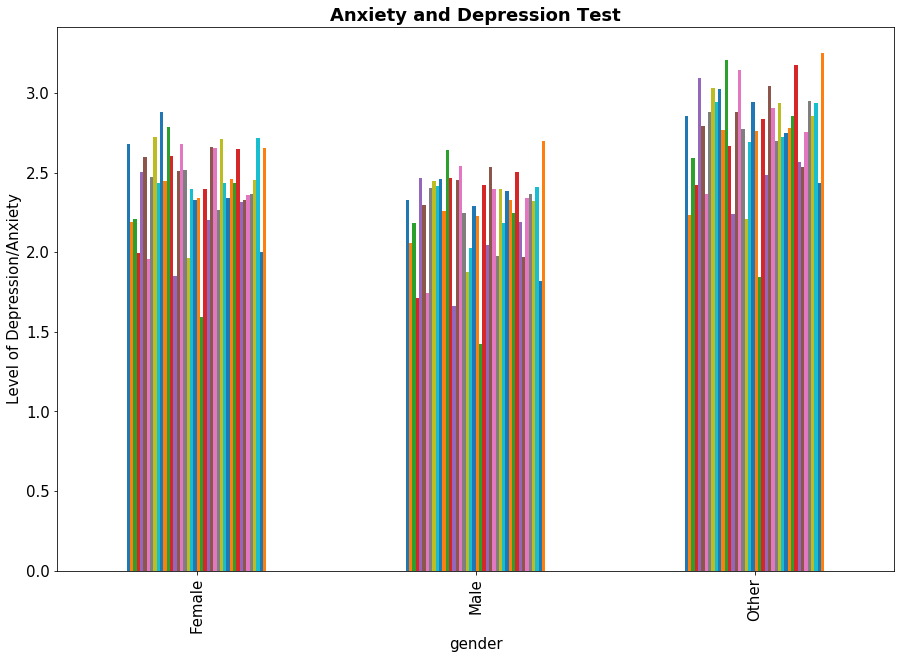

In [16]:
# In order to get just the question ansers I had to limit the list of columns.
DASS_columns = list(DASS.columns)
new_list = []
for thing in DASS_columns:
    if 'A' in thing:
        new_list.append(thing)
  
DASS2.groupby('gender')[new_list].mean().plot(kind='bar', figsize= (15, 10), legend=False)
plt.title('Anxiety and Depression Test', fontweight='bold')
plt.ylabel('Level of Depression/Anxiety')

Text(0,0.5,'Level of Depression/Anxiety')

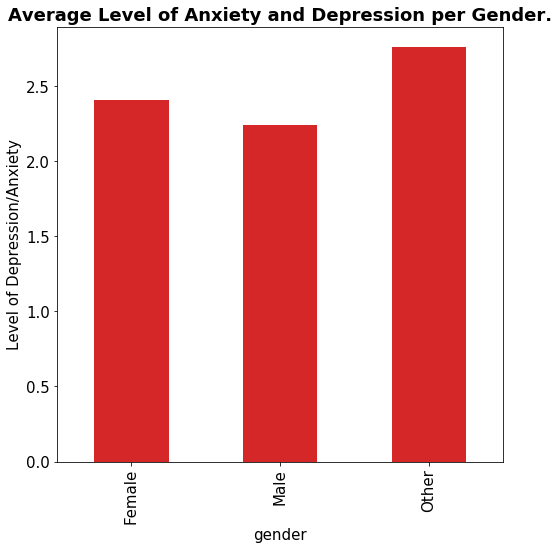

In [17]:
DASS['DASS_mean'] = DASS[new_list].mean(axis=1)
DASS.groupby('gender')['DASS_mean'].mean().plot(kind='bar', figsize= (8, 8), color= 'tab:red')
plt.title('Average Level of Anxiety and Depression per Gender.', fontweight='bold')
plt.ylabel('Level of Depression/Anxiety')

# So these results are interesting when we compare the gender percentage of test takers to the gender percentage of people in the US.

Text(0.5,1,'Percentage of Test Takers by Gender')

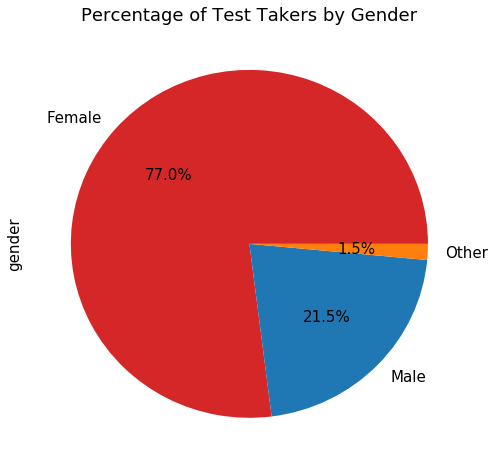

In [18]:
DASS_gender_plot = DASS.gender.value_counts().plot(kind='pie', autopct = '%1.1f%%',figsize=(8,8), colors = colors_for_genders)
plt.title('Percentage of Test Takers by Gender')

## Here's some more data from the __[National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5227946/)__ and that sheds some interesting light on those levels of self esteem with a graph displayed below. <br> 

<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5227946/bin/AJPH.2016.303578f3b.jpg" width="600" />

### It comes out that, "about 1 in every 250 adults" is classified as transgender which is about 0.4% of the population but the percentage of test takers who were transgender/other was about 1.1% or higher depending on the test, which is almost a 300% increase. Since according to the __[United States Census Bureau](https://www.census.gov/quickfacts/fact/table/US/LFE046216)__ women make up about 50.8% of the population but they make up about 75% of test takers on average(guesstimation) which is a 50% increase, there might be a correllation between anxiety/depression/self-esteem and people who take this test.

In [19]:
RSE2['gender'] = RSE2['gender'].apply(numbers_to_genders)
RSE2['Q3'], RSE2['Q5'], RSE2['Q8'], RSE2['Q9'], RSE2['Q10'] = RSE2['Q3'].apply(reorder_numbers_RSE), RSE2['Q5'].apply(reorder_numbers_RSE), RSE2['Q8'].apply(reorder_numbers_RSE), RSE2['Q9'].apply(reorder_numbers_RSE), RSE2['Q10'].apply(reorder_numbers_RSE)
RSE2 = RSE2[(RSE2.Q1 != 0) & (RSE2.Q2 != 0) & (RSE2.Q3 != 0) & (RSE2.Q4 != 0) & (RSE2.Q5 != 0) & (RSE2.Q6 != 0) & (RSE2.Q7 != 0) & (RSE2.Q8 != 0) & (RSE2.Q9 != 0) & (RSE2.Q10 != 0)]
RSE2['RSE_mean'] = RSE2[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q9', 'Q10']].mean(axis=1)

RSE_limited = RSE2[(RSE2['gender'] != 'Other') & (RSE2['gender'] != 'None Chosen') & (RSE2['age'] <= 60) & (RSE2['age'] > 13)]

# I found some other correlating data which supports this. Most participants were between the ages of 14 and 26. I also found that the level of anxiety for that age was higher than at any other age.

Text(0.5,1,'Participants in the Test by Age')

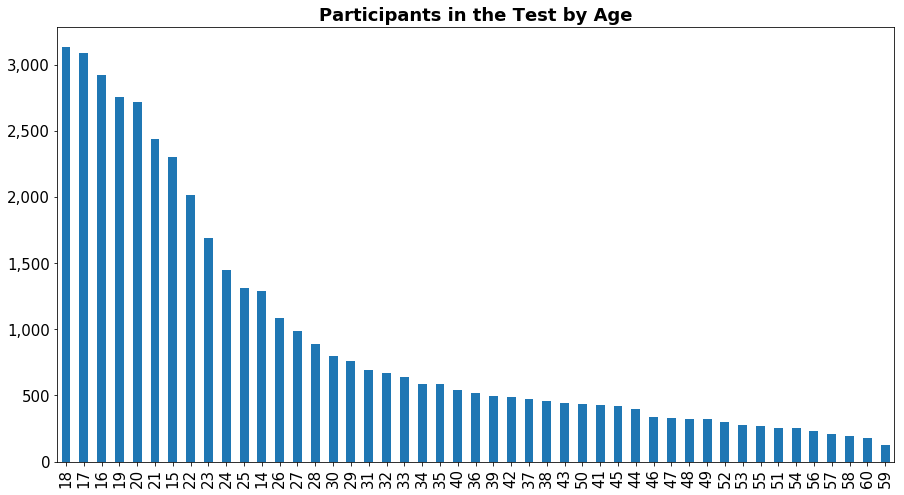

In [20]:
plotting_RSE = RSE_limited['age'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), color = 'tab:blue')
plotting_RSE.set_yticklabels(['{:,}'.format(int(x)) for x in plotting_RSE.get_yticks().tolist()])
plt.title('Participants in the Test by Age', fontweight='bold')

Text(0.5,1,'Levels of Self-Esteem Throughout Life')

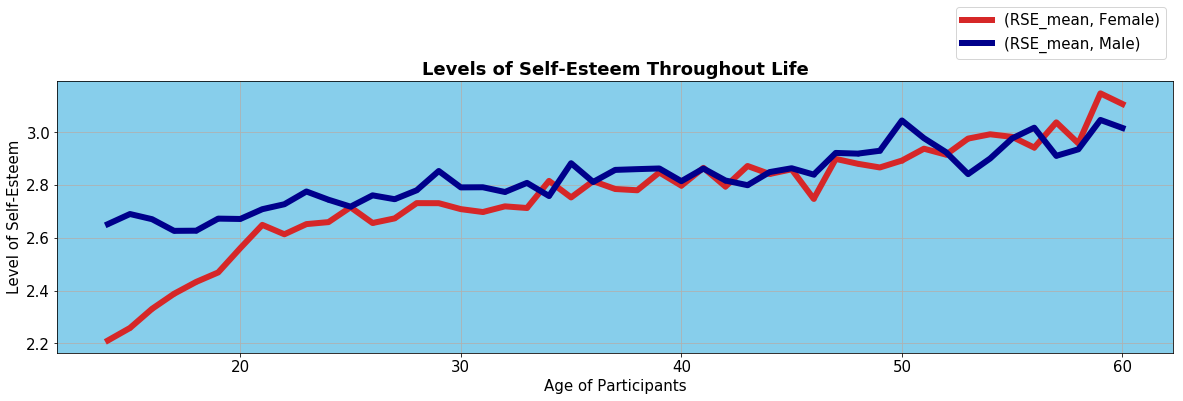

In [21]:
plot_age_of_RSE = RSE_limited.groupby(['age', 'gender'])[['RSE_mean']].mean().unstack().sort_values(by=['age']).plot(style='.-', linewidth = 6.0, kind='line', grid=True, figsize= (20, 5), color = ['tab:red', 'darkblue'])
plot_age_of_RSE.legend( loc='upper right', bbox_to_anchor=(1, 1.3))
plot_age_of_RSE.set_facecolor('skyblue')
plt.xlabel('Age of Participants')
plt.ylabel('Level of Self-Esteem')
plt.title('Levels of Self-Esteem Throughout Life', fontweight='bold')

In [22]:
# DASS_limited.age.sort_values().value_counts()

In [23]:
# RSE['gender'] = RSE['gender'].apply(Numbers_to_Genders)
DASS_limited = DASS[(DASS['gender'] != 'Other') & (DASS['gender'] != 'None Chosen') & (DASS['age'] <= 60) & (DASS['age'] > 13)]


Text(0.5,1,'Anxiety Throughout Life')

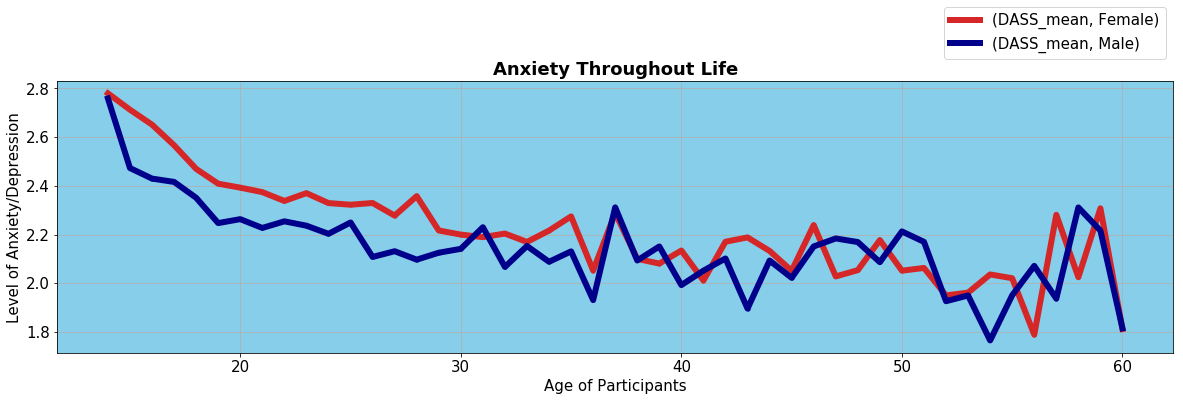

In [24]:
plot_age_of_DASS = DASS_limited.groupby(['age', 'gender'])[['DASS_mean']].mean().unstack().sort_values(by=['age']).plot(style='.-',kind='line', linewidth = 6, grid=True, figsize= (20, 5), color = ['tab:red', 'darkblue'])
plot_age_of_DASS.legend( loc='upper right', bbox_to_anchor=(1, 1.3))
plot_age_of_DASS.set_facecolor('skyblue')
plt.xlabel('Age of Participants')
plt.ylabel('Level of Anxiety/Depression')
plt.title('Anxiety Throughout Life', fontweight='bold')

# Just to add on to this I wondered if marital status had much of an effect who took the test or on overall levels of anxiety etc. 

In [25]:
def replace_marriage_status(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    else:
        return (value)
DASS['married'] = DASS['married'].apply(replace_marriage_status)

In [26]:
DASS_limited2 = DASS[(DASS['gender'] != 'Other') & (DASS['gender'] != 'None Chosen') & (DASS['age'] <= 50) & (DASS['age'] > 14) & (DASS['married'] != 0)]


Text(0.5,1,'Anxiety by Marital Status, Throughout Life')

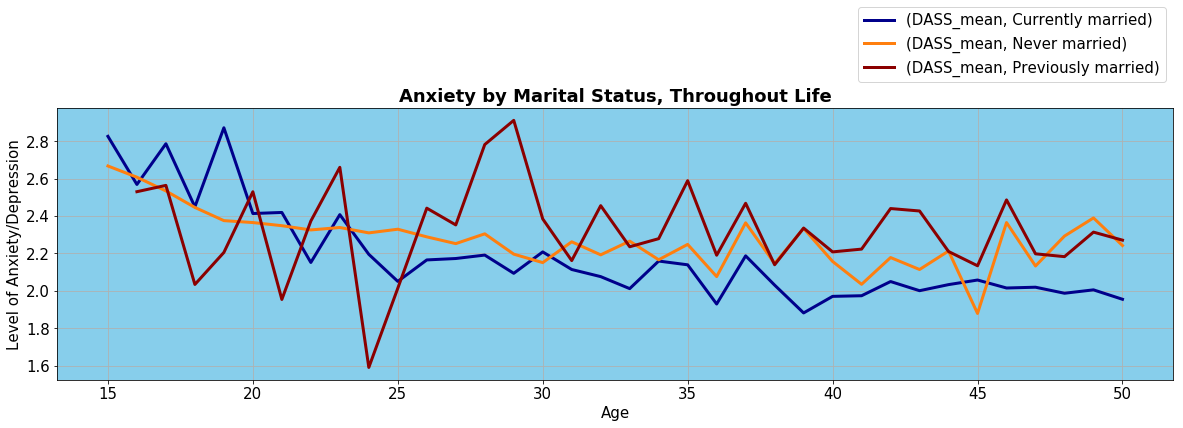

In [27]:
DASS_life = DASS_limited2.groupby(['age', 'married'])[['DASS_mean']].mean().unstack().sort_values(by=['age']).plot(kind='line', grid=True, figsize= (20, 5), linewidth = 3, color = ['darkblue', 'tab:orange', 'darkred'])
DASS_life.legend( bbox_to_anchor=(1, 1.4))
plt.ylabel('Level of Anxiety/Depression')
plt.xlabel('Age')
DASS_life.set_facecolor('skyblue')
plt.title('Anxiety by Marital Status, Throughout Life', fontweight= 'bold')

In [28]:
big5 = big5[(big5['source'] != 1)]
RSE = RSE[(RSE['source']!= 1)]

Text(0.5,1,'How people got to the Test')

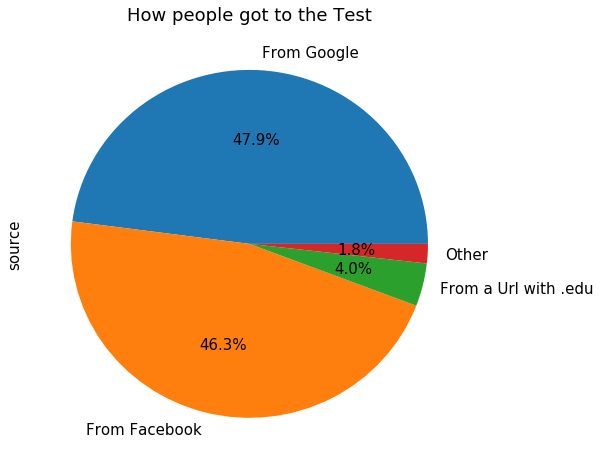

In [29]:
big5.source.value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize= (8, 8), labels = ['From Google', 'From Facebook', 'From a Url with .edu', 'Other'])
plt.title('How people got to the Test')

Text(0.5,1,'How people got to the Test.')

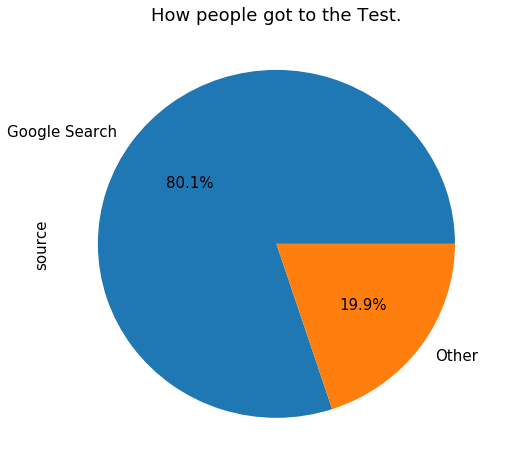

In [30]:
RSE['source'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize= (8, 8), labels = ['Google Search', 'Other'])
plt.title('How people got to the Test.')

Text(0,0.5,'Source info')

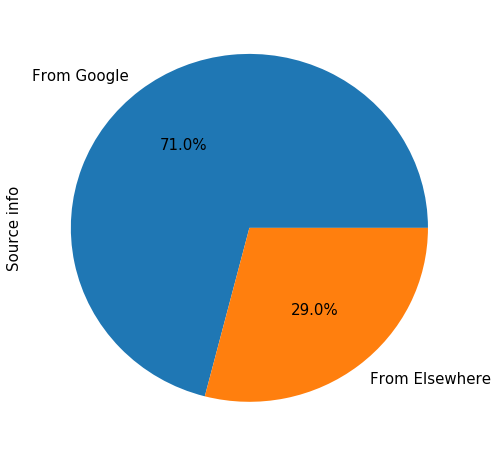

In [31]:
OSRI.fromgoogle.value_counts().plot(kind='pie', labels=['From Google', 'From Elsewhere'], autopct='%1.1f%%', figsize= (8, 8), colors = [ 'tab:blue', 'tab:orange'])
plt.ylabel('Source info')

<img src="https://www.brandwatch.com/wp-content/resize/uploads/2014/03/social-media-infographic.jpg" width="650" />